In [1]:
import pandas as pd

# Read the depression and anxiety data into separate dataframes
depression_df = pd.read_csv("depression_1922.csv")
anxiety_df = pd.read_csv("anxiety_1922.csv")

# Combine the dataframes into one
combined_df = pd.concat([depression_df, anxiety_df], ignore_index=True)

# Clean the dataframe by dropping any null values
combined_df.dropna(inplace=True)


In [3]:
len(combined_df['author'].unique())

351409

In [32]:
# Create a column for the year
combined_df['year'] = pd.DatetimeIndex(combined_df['created_utc']).year

# Group the posts by year and count the number of posts in each year for each subreddit
grouped_df = combined_df.groupby(['year', 'subreddit'])['title'].count().reset_index()

# Print the total number of posts for each year in each subreddit
for year in [2019, 2020, 2021, 2022]:
    year_df = grouped_df[grouped_df['year'] == year]
    print(f"Year {year}:")
    print(f"\t r/depression: {year_df[year_df['subreddit'] == 'depression']['title'].iloc[0]}")
    print(f"\t r/Anxiety: {year_df[year_df['subreddit'] == 'anxiety']['title'].iloc[0]}")

# Calculate the total number of posts for each subreddit over the four years
total_depression_posts = grouped_df[grouped_df['subreddit'] == 'depression']['title'].sum()
total_anxiety_posts = grouped_df[grouped_df['subreddit'] == 'anxiety']['title'].sum()

print(f"\nTotal number of posts in r/depression from 2019-2022: {total_depression_posts}")
print(f"Total number of posts in r/Anxiety from 2019-2022: {total_anxiety_posts}")

Year 2019:
	 r/depression: 138517
	 r/Anxiety: 49295
Year 2020:
	 r/depression: 119543
	 r/Anxiety: 54053
Year 2021:
	 r/depression: 95242
	 r/Anxiety: 53992
Year 2022:
	 r/depression: 85283
	 r/Anxiety: 56527

Total number of posts in r/depression from 2019-2022: 438585
Total number of posts in r/Anxiety from 2019-2022: 213867


In [33]:
import string
import contractions
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

def clean_text(text):
    # Remove punctuation and convert to lowercase
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = text.lower()
    
    # Remove short words (less than 3 characters)
    text = ' '.join([word for word in text.split() if len(word) > 2])
    
    # Remove numbers
    text = ''.join([word for word in text if not word.isdigit()])
    
    # Fix contractions
    text = contractions.fix(text)
    
    # Remove stopwords and lemmatize
    stop_words = set(stopwords.words('english'))
    lemmatizer = WordNetLemmatizer()
    text = ' '.join([lemmatizer.lemmatize(word) for word in text.split() if word not in stop_words])
    
    return text

In [34]:
# Clean the selftext column
combined_df['clean_selftext'] = combined_df['selftext'].apply(clean_text)

In [35]:
# Convert the created_utc column to datetime format
combined_df['created_utc'] = pd.to_datetime(combined_df['created_utc'])


In [36]:
economic_keywords = ['unemployed', 'economy', 'mortgage', 'layoff', 'recession', 'stimulus', 'evict', 'enough money', 'more money', 'pay the bill', 'owe', 'afford', 'wage', 'job', 'eviction', 'income', 'rent', 'credit', 'salary', 'bills', 'laid', 'jobless', 'savings', 'lost job', 'fulltime', 'debt', 'financial', 'paycheck']


In [37]:
 #Group the posts by month and count the number of posts containing any economic keywords
depression_counts = combined_df[combined_df['subreddit']=='depression'].groupby(pd.Grouper(key='created_utc', freq='M'))['selftext'].apply(lambda x: x.str.contains('|'.join(economic_keywords)).sum())
anxiety_counts = combined_df[combined_df['subreddit']=='anxiety'].groupby(pd.Grouper(key='created_utc', freq='M'))['selftext'].apply(lambda x: x.str.contains('|'.join(economic_keywords)).sum())


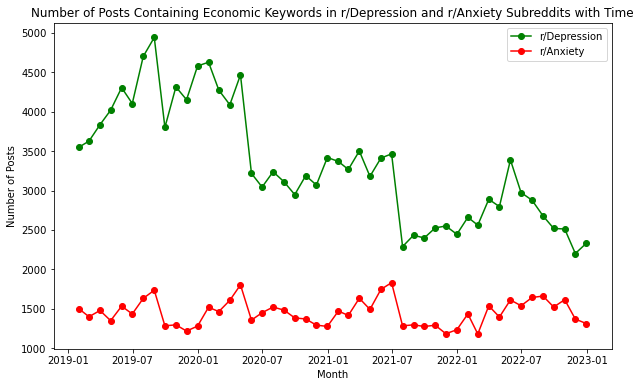

In [38]:
# Plot the post distribution over time
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10, 6))
plt.plot(depression_counts.index, depression_counts, 'o-', color='green',label='r/Depression')
plt.plot(anxiety_counts.index, anxiety_counts,'o-',color='red', label='r/Anxiety')
plt.legend()
plt.xlabel('Month')
plt.ylabel('Number of Posts')
plt.title('Number of Posts Containing Economic Keywords in r/Depression and r/Anxiety Subreddits with Time')
plt.show()

In [39]:
combined_df.shape

(652452, 7)

In [40]:
combined_df.head(3)

,author,created_utc,selftext,title,subreddit,clean_selftext,year
0,Supreme_wing,2019-04-01 00:03:28,god. i dont get people sometimes. just some pe...,Just a rant on a Sunday night,depression,god get people sometimes people tendency make ...,2019
1,tubrafinho,2019-04-01 00:13:47,"this will be my first post here, and i'm relat...",what to do when you really want to die but at ...,depression,first post relatively new reddit two year ever...,2019
2,zillarillazilla,2019-04-01 00:14:20,apologies if this isn’t allowed - feel free to...,How to help my friend,depression,apology allowed feel free point elsewhere frie...,2019


In [41]:
# Group the posts by month and count the number of posts containing any economic keywords
depression_counts = combined_df[combined_df['subreddit']=='depression'].groupby(pd.Grouper(key='created_utc', freq='M'))['selftext'].apply(lambda x: x.str.contains('|'.join(economic_keywords)).sum())
anxiety_counts = combined_df[combined_df['subreddit']=='anxiety'].groupby(pd.Grouper(key='created_utc', freq='M'))['selftext'].apply(lambda x: x.str.contains('|'.join(economic_keywords)).sum())

# Group the posts by month and count the total number of posts
total_depression_posts = combined_df[combined_df['subreddit']=='depression'].groupby(pd.Grouper(key='created_utc', freq='M'))['selftext'].count()
total_anxiety_posts = combined_df[combined_df['subreddit']=='anxiety'].groupby(pd.Grouper(key='created_utc', freq='M'))['selftext'].count()

# Calculate the proportion of posts containing any economic keywords
depression_proportions = depression_counts / total_depression_posts
anxiety_proportions = anxiety_counts / total_anxiety_posts


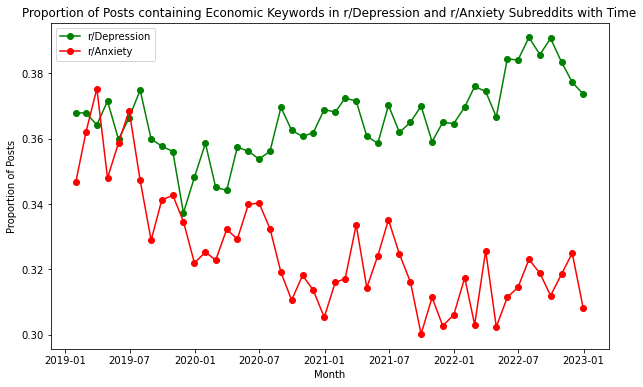

In [42]:
# Plot the proportion of posts containing any economic keywords over time
fig, ax = plt.subplots(figsize=(10, 6))
plt.plot(depression_proportions.index, depression_proportions,'o-', color='green',label='r/Depression')
plt.plot(anxiety_proportions.index, anxiety_proportions,'o-',color='red', label='r/Anxiety')
plt.legend()
plt.xlabel('Month')
plt.ylabel('Proportion of Posts')
plt.title('Proportion of Posts containing Economic Keywords in r/Depression and r/Anxiety Subreddits with Time')
plt.show()

In [46]:
social_keywords = ["bullying", "loneliness", "emptiness", "quarantine", "alone", "lonely", 
                   "lockdown", "distancing", "insecurities", "no one cares", "trapped", 
                   "feel ignored", "single", "can't see my", "ignoring me"]
 

In [44]:
def plot_posts_time(keywords):
    #Group the posts by month and count the number of posts containing any economic keywords
    depression_counts = combined_df[combined_df['subreddit']=='depression'].groupby(pd.Grouper(key='created_utc', freq='M'))['selftext'].apply(lambda x: x.str.contains('|'.join(keywords)).sum())
    anxiety_counts = combined_df[combined_df['subreddit']=='anxiety'].groupby(pd.Grouper(key='created_utc', freq='M'))['selftext'].apply(lambda x: x.str.contains('|'.join(keywords)).sum())
    # Plot the post distribution over time
    import matplotlib.pyplot as plt
    fig, ax = plt.subplots(figsize=(10, 6))
    plt.plot(depression_counts.index, depression_counts, 'o-', color='green',label='r/Depression')
    plt.plot(anxiety_counts.index, anxiety_counts,'o-',color='red', label='r/Anxiety')
    plt.legend()
    plt.xlabel('Month')
    plt.ylabel('Number of Posts')
    plt.title('Number of Posts in r/Depression and r/Anxiety Subreddits with Time')
    plt.show()

In [49]:
def plot_propotionposts_time(keywords):
    # Group the posts by month and count the number of posts containing any economic keywords
    depression_counts = combined_df[combined_df['subreddit']=='depression'].groupby(pd.Grouper(key='created_utc', freq='M'))['selftext'].apply(lambda x: x.str.contains('|'.join(keywords)).sum())
    anxiety_counts = combined_df[combined_df['subreddit']=='anxiety'].groupby(pd.Grouper(key='created_utc', freq='M'))['selftext'].apply(lambda x: x.str.contains('|'.join(keywords)).sum())

    # Group the posts by month and count the total number of posts
    total_depression_posts = combined_df[combined_df['subreddit']=='depression'].groupby(pd.Grouper(key='created_utc', freq='M'))['selftext'].count()
    total_anxiety_posts = combined_df[combined_df['subreddit']=='anxiety'].groupby(pd.Grouper(key='created_utc', freq='M'))['selftext'].count()

    # Calculate the proportion of posts containing any economic keywords
    depression_proportions = depression_counts / total_depression_posts
    anxiety_proportions = anxiety_counts / total_anxiety_posts

    # Plot the proportion of posts containing any economic keywords over time
    fig, ax = plt.subplots(figsize=(10, 6))
    plt.plot(depression_proportions.index, depression_proportions,'o-', color='green',label='r/Depression')
    plt.plot(anxiety_proportions.index, anxiety_proportions,'o-',color='red', label='r/Anxiety')
    plt.legend()
    plt.xlabel('Month')
    plt.ylabel('Proportion of Posts')
    plt.title('Proportion of Posts in r/Depression and r/Anxiety Subreddits with Time')
    plt.show()

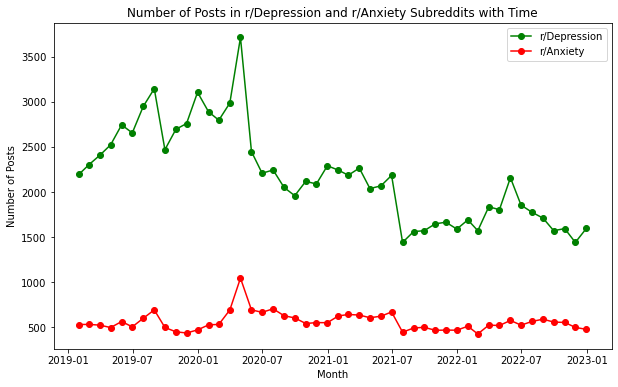

In [47]:
plot_posts_time(social_keywords)

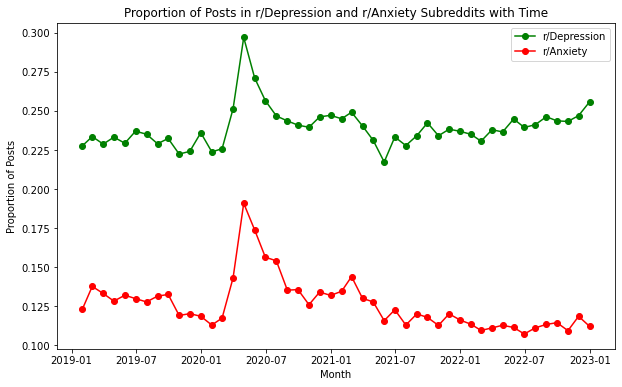

In [50]:
plot_propotionposts_time(social_keywords)

In [51]:
Domestic = ['domestic violence', 'abuse', 'yelling', 'fighting', 'single mom', 'single dad', 'single parent', 'hit me', 'slapped me', 'divorced', 'abusive', 'cheating', 'separation', 'toxic', 'abused', 'custody battles']

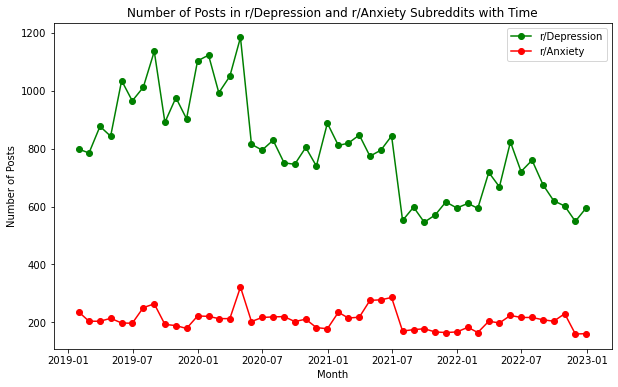

In [52]:
plot_posts_time(Domestic)

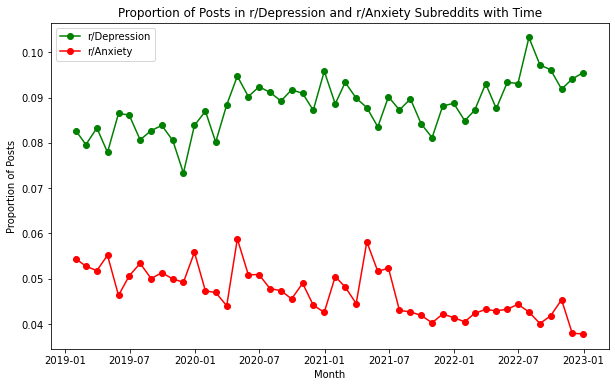

In [53]:
plot_propotionposts_time(Domestic)

In [54]:
educational_keywords = ['Exam', 'assignment', 'Online classes', 'school closures', 'distance learning', 'grade', 'homework', 'courses', 'school', 'presentation', 'classroom', 'test', 'virtual learning', 'hybrid learning', 'remote learning', 'online meeting', 'zoom', 'Microsoft team', 'google classroom', 'virtual classrooms']


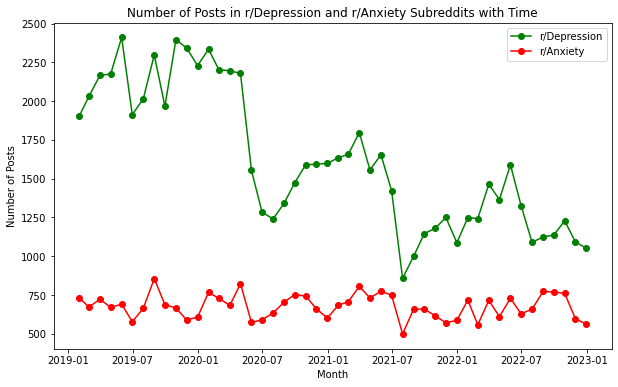

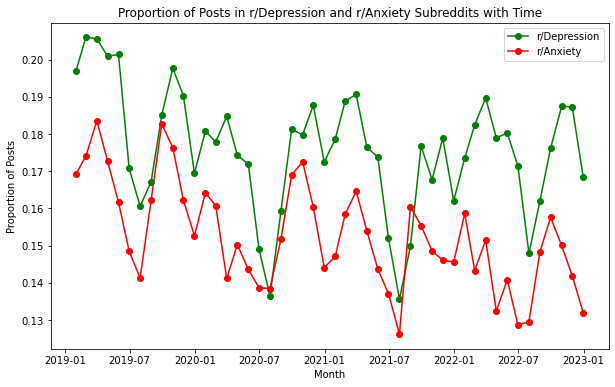

In [55]:
plot_posts_time(educational_keywords)
plot_propotionposts_time(educational_keywords)

In [56]:
substance = ['smoke', 'smoked', 'drink', 'snort', 'drugs', 'smoking', 'alcohol', 'nicotine', 'caffeine', 'beer', 'substance', 'ketamine', 'tablets', 'valium', 'opioid', 'vodka', 'whiskey', 'whisky', 'meth', 'addiction', 'rehab', 'relapse', 'overdose']


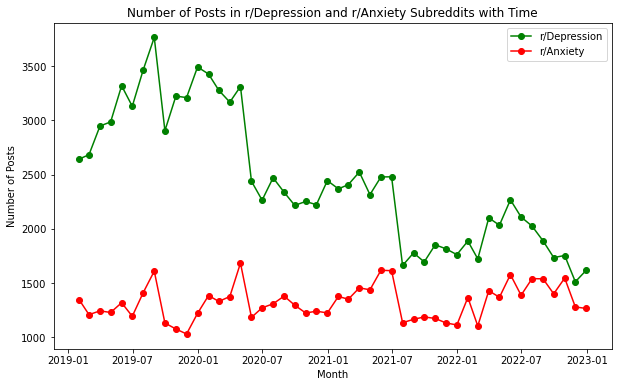

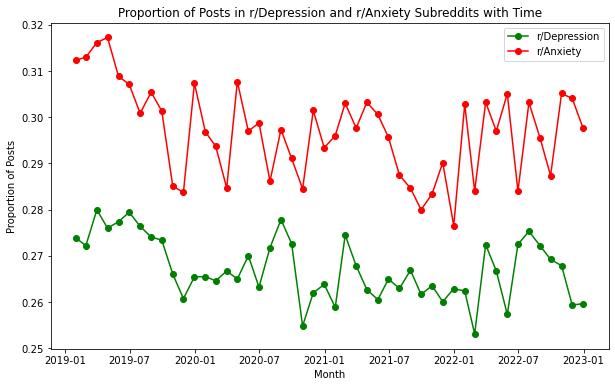

In [57]:
plot_posts_time(substance)
plot_propotionposts_time(substance)

In [58]:
suicide_tokens = ['suicidal thoughts', 'ending my life', 'death seems preferable', 'hopelessness', 'no reason to live', 'overwhelming sadness', 'feeling worthless', 'want to disappear', 'self-harm', 'seeking a way out', 'loneliness', 'mental pain', 'feeling trapped', 'desperation', 'feeling like a burden', 'struggling to cope', 'lack of purpose', 'wanting the pain to stop', 'broken inside', 'losing the will to live', 'dark thoughts', 'crisis', 'mental anguish', 'depression', 'anxiety']

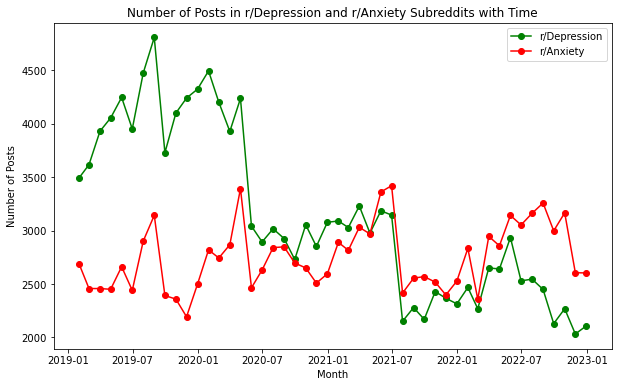

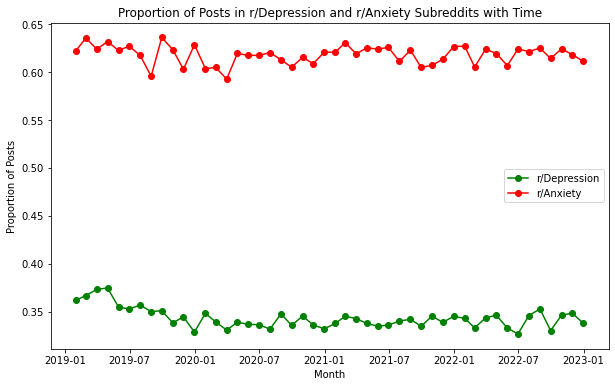

In [59]:
plot_posts_time(suicide_tokens)
plot_propotionposts_time(suicide_tokens)